In [1]:
import cartopy.feature as feature
import cartopy.crs as ccrs
from calendar import month_abbr
import matplotlib.dates as mdates
from pathlib import Path 
import subprocess 
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import datetime
import numpy as np
import pandas as pd
import xarray
import xesmf
import os 
from glob import glob
from plot_common import autoextend_colorbar, corners, get_map_norm, open_var, add_ticks, annotate_skill, save_figure
import xskillscore as xs 
from scipy.stats import ttest_1samp
import statistics
import scipy 


In [2]:
def open_var(pp_root, kind, var):
    freq = 'daily' if 'daily' in kind else 'monthly'
    longslice = '19930101-19981231' if freq == 'daily' else '199301-199812'
    longfile = os.path.join(pp_root, 'pp', kind, 'ts', freq, '5yr', f'{kind}.{longslice}.{var}.nc')
    if os.path.isfile(longfile):
        os.system(f'dmget {longfile}')
        return xarray.open_dataset(longfile)[var]
    elif len(glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '1yr', f'{kind}.*.{var}.nc'))) > 0:
        files = glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '1yr', f'{kind}.*.{var}.nc'))
        os.system(f'dmget {" ".join(files)}')
        return xarray.open_mfdataset(files)[var]
    elif len(glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '5yr', f'{kind}.*.{var}.nc'))) > 0:
        files = glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '5yr', f'{kind}.*.{var}.nc'))
        os.system(f'dmget {" ".join(files)}')
        return xarray.open_mfdataset(files)[var]
    else:
        raise Exception('Did not find postprocessed files')
        

In [3]:
obs_sst = xarray.open_mfdataset('/work/vnk/obs_and_reanalyses/oisst_v2/sst.mon.mean.nc')['sst']
obs_sst_grid = xarray.open_mfdataset('/work/vnk/obs_and_reanalyses/oisst_v2/sst.mon.mean.grid.nc') 
model_grid = xarray.open_dataset('../data/geography/ocean_static.nc')


In [4]:
obsregrd = xesmf.Regridder(obs_sst_grid, {'lat': model_grid.geolat, 'lon': model_grid.geolon}, 
        method='bilinear', 
        unmapped_to_nan=True)

obs_regriddeda = obsregrd(obs_sst)
obs_regridded = obs_regriddeda.sel(time=slice('1993','2007'))


In [5]:
rootmed1 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_1/gfdl.ncrc5-intel22-prod') 
rootlow1 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_1/gfdl.ncrc5-intel22-prod')
rootmed2 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_2/gfdl.ncrc5-intel22-prod') 
rootlow2 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_2/gfdl.ncrc5-intel22-prod')
rootmed3 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_3/gfdl.ncrc5-intel22-prod') 
rootlow3 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_3/gfdl.ncrc5-intel22-prod')
rootmed4 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_4/gfdl.ncrc5-intel22-prod') 
rootlow4 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_4/gfdl.ncrc5-intel22-prod')
rootmed5 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_5/gfdl.ncrc5-intel22-prod') 
rootlow5 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_5/gfdl.ncrc5-intel22-prod')


In [6]:
sstwholemed1 = open_var(rootmed1, 'ocean_monthly', 'tos').resample(time = "1MS").first() 
sstwholelow1 = open_var(rootlow1, 'ocean_monthly', 'tos').resample(time = "1MS").first() 
sstwholemed2 = open_var(rootmed2, 'ocean_monthly', 'tos').resample(time = "1MS").first() 
sstwholelow2 = open_var(rootlow2, 'ocean_monthly', 'tos').resample(time = "1MS").first()
sstwholemed3 = open_var(rootmed3, 'ocean_monthly', 'tos').resample(time = "1MS").first() 
sstwholelow3 = open_var(rootlow3, 'ocean_monthly', 'tos').resample(time = "1MS").first()
sstwholemed4 = open_var(rootmed4, 'ocean_monthly', 'tos').resample(time = "1MS").first() 
sstwholelow4 = open_var(rootlow4, 'ocean_monthly', 'tos').resample(time = "1MS").first()
sstwholemed5 = open_var(rootmed5, 'ocean_monthly', 'tos').resample(time = "1MS").first() 
sstwholelow5 = open_var(rootlow5, 'ocean_monthly', 'tos').resample(time = "1MS").first()


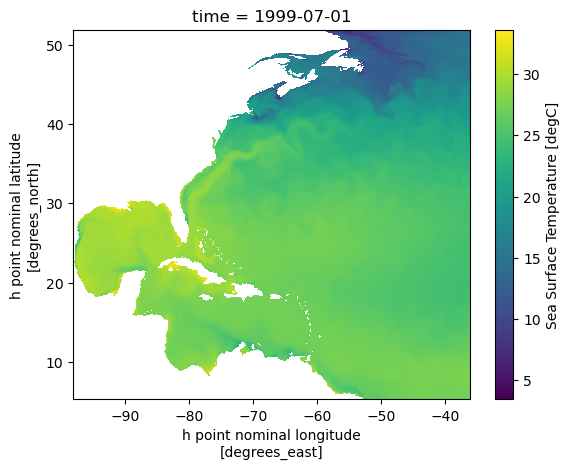

In [7]:
sstwholemed1.isel(time=78).plot() 

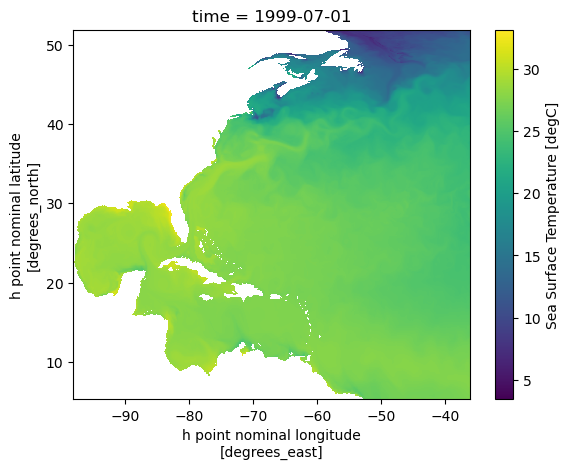

In [8]:
sstwholelow1.isel(time=78).plot() 

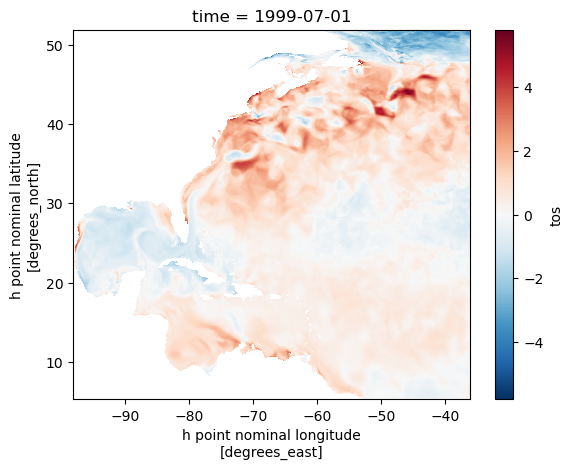

In [9]:
(sstwholelow1.isel(time=78)-sstwholemed1.isel(time=78)).plot()

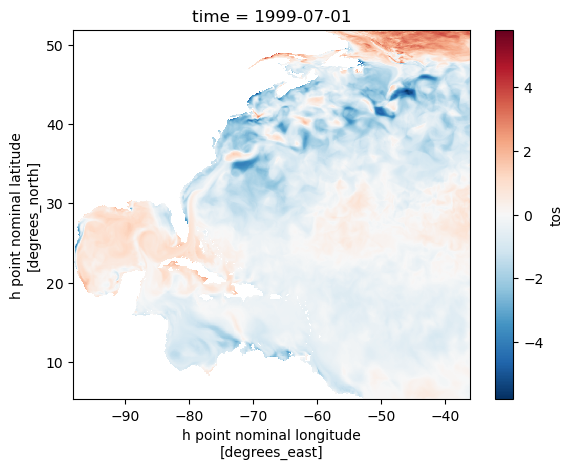

In [10]:
(sstwholemed1.isel(time=78)-sstwholelow1.isel(time=78)).plot() 